In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 载入数据集
mnist = tf.keras.datasets.mnist
# 载入训练集和测试集
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 对训练集和测试集的数据进行归一化处理，有助于提升模型训练速度
x_train, x_test = x_train / 255.0, x_test / 255.0
# 把训练集和测试集的标签转为独热编码
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

# 模型定义，model1不用label smoothing
model1 = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(units=200,activation='tanh'),
        Dense(units=100,activation='tanh'),
        Dense(units=10,activation='softmax')
        ])

# 在定义一个一模一样的模型用于对比测试，model2使用label smoothing
model2 = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(units=200,activation='tanh'),
        Dense(units=100,activation='tanh'),
        Dense(units=10,activation='softmax')
        ])

# model1不用label smoothing
loss1 = CategoricalCrossentropy(label_smoothing=0)
# model2使用label smoothing
loss2 = CategoricalCrossentropy(label_smoothing=0.1)

# sgd定义随机梯度下降法优化器
# loss定义交叉熵代价函数
# metrics=['accuracy']模型在训练的过程中同时计算准确率
sgd = SGD(0.2)
model1.compile(optimizer=sgd,
              loss=loss1,
              metrics=['accuracy'])
model2.compile(optimizer=sgd,
              loss=loss2,
              metrics=['accuracy'])

# 传入训练集数据和标签训练模型
# 周期大小为30（把所有训练集数据训练一次称为训练一个周期）
epochs = 30
# 批次大小为32（每次训练模型传入32个数据进行训练）
batch_size=32
# 先训练model1
history1 = model1.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test,y_test))
# 再训练model2
history2 = model2.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2526 - accuracy: 0.9235 - val_loss: 0.1460 - val_accuracy: 0.9571
Epoch 2/30
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1139 - accuracy: 0.9659 - val_loss: 0.0915 - val_accuracy: 0.9700
Epoch 3/30
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0781 - accuracy: 0.9752 - val_loss: 0.0927 - val_accuracy: 0.9705
Epoch 4/30
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0586 - accuracy: 0.9816 - val_loss: 0.0869 - val_accuracy: 0.9726
Epoch 5/30
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0441 - accuracy: 0.9865 - val_loss: 0.0875 - val_accuracy: 0.9725
Epoch 6/30
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.0724 - val_accuracy: 0.9759
Epoch 7/30
60000/60000 [==============================] 

Epoch 25/30
60000/60000 [==============================] - 3s 51us/sample - loss: 0.5154 - accuracy: 0.9993 - val_loss: 0.5529 - val_accuracy: 0.9822
Epoch 26/30
60000/60000 [==============================] - 3s 51us/sample - loss: 0.5149 - accuracy: 0.9994 - val_loss: 0.5535 - val_accuracy: 0.9824
Epoch 27/30
60000/60000 [==============================] - 3s 50us/sample - loss: 0.5142 - accuracy: 0.9995 - val_loss: 0.5528 - val_accuracy: 0.9818
Epoch 28/30
60000/60000 [==============================] - 3s 50us/sample - loss: 0.5137 - accuracy: 0.9995 - val_loss: 0.5533 - val_accuracy: 0.9820
Epoch 29/30
60000/60000 [==============================] - 3s 51us/sample - loss: 0.5131 - accuracy: 0.9996 - val_loss: 0.5540 - val_accuracy: 0.9814
Epoch 30/30
60000/60000 [==============================] - 3s 51us/sample - loss: 0.5127 - accuracy: 0.9996 - val_loss: 0.5527 - val_accuracy: 0.9817


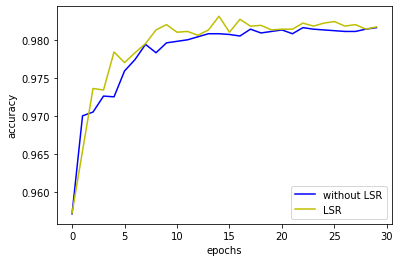

In [5]:
# 画出model1验证集准确率曲线图
plt.plot(np.arange(epochs),history1.history['val_accuracy'],c='b',label='without LSR')
# 画出model2验证集准确率曲线图
plt.plot(np.arange(epochs),history2.history['val_accuracy'],c='y',label='LSR')
# 图例
plt.legend()
# x坐标描述
plt.xlabel('epochs')
# y坐标描述
plt.ylabel('accuracy')
# 显示图像
plt.show()